In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import qutip as qt
import matplotlib
import matplotlib.pyplot as plt
import os

plt.rcParams.update({'font.size': 8})
plt.rcParams.update({'figure.dpi': 150})

import scipy
import pandas as pd

        
iterations_cumulative=np.load("save/iterations_cumulative.npy", allow_pickle=True)
visited_cumulative=np.load("save/visited_cumulative.npy", allow_pickle=True)
displacements_cumulative=np.load("save/displacements_cumulative.npy", allow_pickle=True)
optimal_alphas=np.load("save/optimal_alphas.npy", allow_pickle=True)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
N=200
a=qt.destroy(N)
alphas=np.linspace(0,8,200)
focks=np.arange(40)



optimal_alphas=np.zeros((8, len(focks)))
relative_amplitude=np.zeros((8, len(focks),len(alphas)))
probs=np.zeros((8, len(focks),len(alphas),N))




def optimal_alphas_(target):
    optimal_alphas_temp=np.zeros(len(focks))
    relative_amplitude_temp=np.zeros((len(focks),len(alphas)))
    probs_temp=np.zeros((len(focks),len(alphas),N))
    
    
    for index_fock, fock in enumerate(focks):
        rho=(qt.fock(N,fock))
        fidelities=[]
        for index_alpha, alpha in enumerate(alphas):
            U=(alpha*a.dag()-np.conj(alpha)*a).expm()
            res=U*rho
            probs_temp[index_fock, index_alpha]=np.real(res.full()[:,0][::-1])
            relative_amplitude_temp[index_fock, index_alpha]=np.abs(res[target])

        target_alpha=alphas[np.argmax(relative_amplitude_temp[index_fock])]
        optimal_alphas_temp[index_fock]=target_alpha
    return optimal_alphas_temp, probs_temp, relative_amplitude_temp


for i in np.arange(8):
    print(i)
    optimal_alphas[i], probs[i], relative_amplitude[i] = optimal_alphas_(target=i)

    






0


KeyboardInterrupt: 

In [17]:
np.save("save/optimal_alphas.npy", optimal_alphas)

6.0 [[1.52299807e-08+0.j]]
5.547738693467337 [[-6.17530407e-06+0.j]]
5.125628140703517 [[0.00057916+0.j]]
4.793969849246231 [[-0.01327486+0.j]]
4.522613065326633 [[0.09994215+0.j]]
4.281407035175879 [[-0.25117278+0.j]]
4.0703517587939695 [[0.05085164+0.j]]
3.85929648241206 [[0.18963646+0.j]]


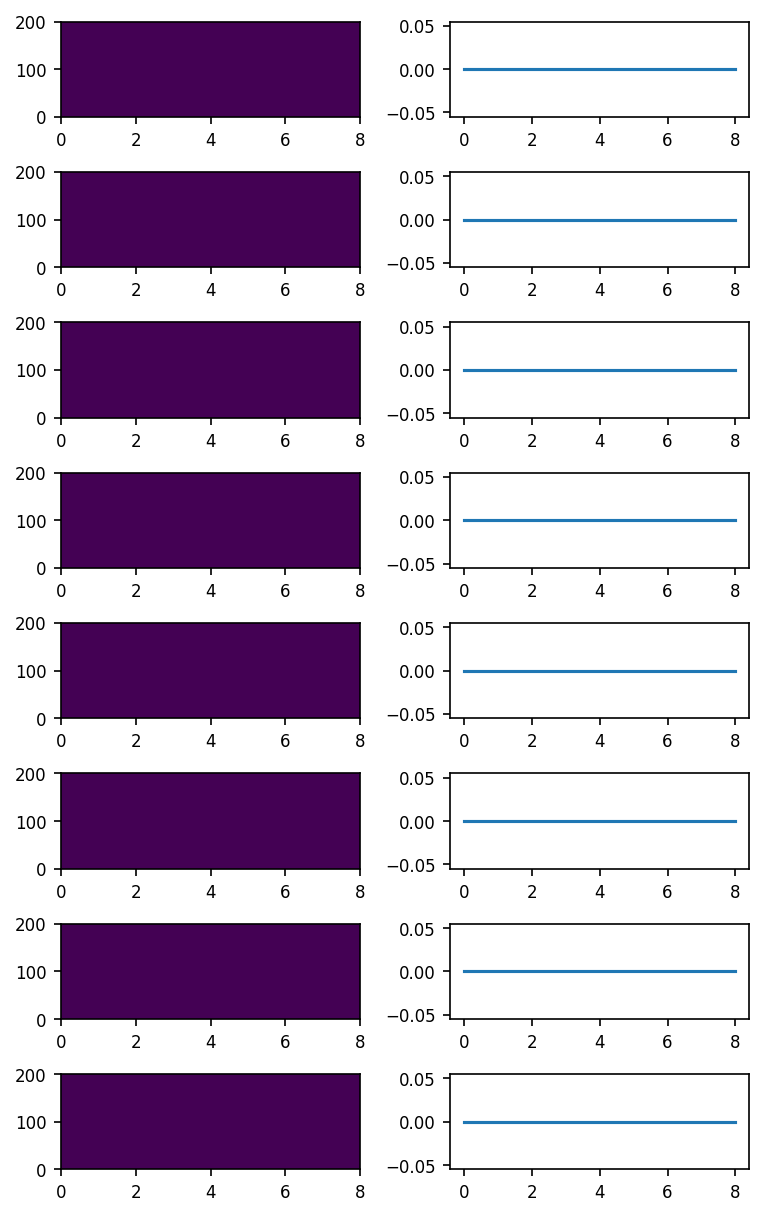

In [9]:
fig, ax=plt.subplots(8,2,figsize=(5, 8), constrained_layout=True)    
for i in range(8):
    ax[i,0].imshow(probs[i, -1].transpose(),extent=(alphas[0],alphas[-1],0,N),aspect="auto",vmin=0, vmax=1)
    ax[i,1].plot(alphas,relative_amplitude[i, -1])
    #ax[1].vlines(alphas[np.argmax(fidelities)],0,20, linestyle="dashed", color="red")
#np.save("save/optimal_alphas.npy", optimal_alphas)

for fock in np.arange(8):
    init_state=qt.fock(N,fock)
    alpha=optimal_alphas[fock, -1]
    U=(alpha*a.dag()-np.conj(alpha)*a).expm()
    res=U*init_state
    print(alpha, res[fock])

In [10]:
def iterations(target, num_iterations=10000):

    
    sigma=(qt.fock(N,target)).unit().proj()
    target_rho=(qt.fock(N,target)).unit().proj()
    proj_target=qt.projection(N,target,target)

    proj_rest=qt.projection(N,0,0)
    for i in range(1,N):
        proj_rest+=qt.projection(N,i,i)
    proj_rest-=proj_target

    
    cut_off_fock=len(focks)
    iterations=np.zeros(num_iterations)
    visited=[]
    displacements=[]



    init_rho=(qt.fock(N,0)).unit().proj()
    alpha=optimal_alphas[target, 0]
    U=(alpha*a.dag()-np.conj(alpha)*a).expm()
    init_rho=U*init_rho*U.dag()

    for iteration in range(num_iterations):
        if iteration%100==0:
            print(iteration)
        rho=init_rho
        count=0
        probs=np.zeros(N)

        visited.append([0])
        displacements.append([alpha])


        while True:
            count+=1
            if np.random.rand() < (rho*proj_target).tr():
                visited[iteration].append("Target")
                iterations[iteration]=count
                break
            else:
                rho=(proj_rest*rho*proj_rest)/((rho*proj_rest).tr())
                for i in range(N):
                    probs[i]=(rho*qt.projection(N,i,i)).tr()
                target_fock=np.random.choice(N,p=probs)
                if target_fock<cut_off_fock:
                    rho=(qt.fock(N,target_fock)).unit().proj()
                    alpha=optimal_alphas[target, target_fock]
                    U=(alpha*a.dag()-np.conj(alpha)*a).expm()
                    rho=U*rho*U.dag()
                    displacements[iteration].append([alpha])
                    visited[iteration].append(target_fock)
                else:
                    iterations[iteration]=-1
                    visited[iteration].append("Fail")
                    break

    return iterations, visited, displacements



        
    
iterations_cumulative = []
visited_cumulative = [] 
displacements_cumulative = [] 

num_iterations = 5000

for i in np.arange(8):
    print("\n\n\n\n\n", "Fock state: {}".format(i))
    output = iterations(target=i, num_iterations=num_iterations)
    iterations_cumulative.append(output[0])
    visited_cumulative.append(output[1])
    displacements_cumulative.append(output[2])


iterations=np.save("save/iterations_cumulative.npy", iterations_cumulative)
visited_cumulative=np.save("save/visited_cumulative.npy", visited_cumulative)
displacements_cumulative=np.save("save/displacements_cumulative.npy", displacements_cumulative)
optimal_alphas=np.save("save/optimal_alphas.npy", optimal_alphas)






 Fock state: 0
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900





 Fock state: 1
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900





 Fock state: 2
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900





 Fock state: 3
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
430

Probability of success for 0: 0
Probability of success for 1: 0.905
Probability of success for 2: 0.8942
Probability of success for 3: 0.9078
Probability of success for 4: 0.9058000000000002
Probability of success for 5: 0.9017999999999998
Probability of success for 6: 0.9065999999999999
Probability of success for 7: 0.9062


(0, 1)

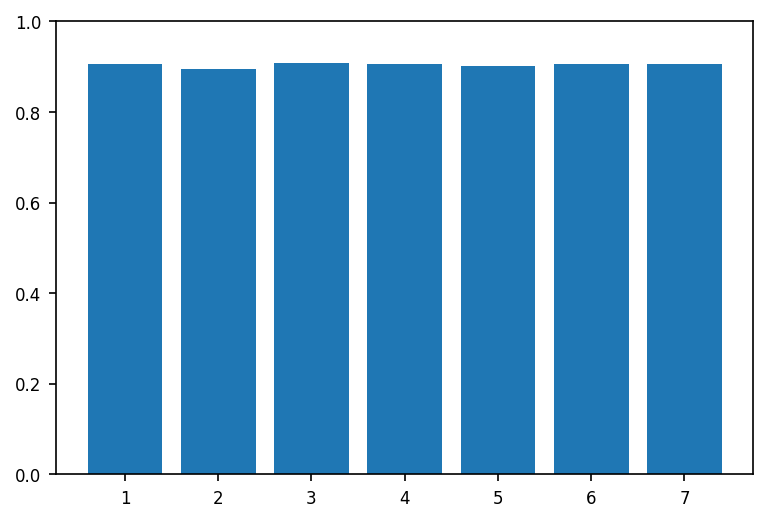

In [41]:
successes = np.zeros(8)

for target in np.arange(8):
    hist=np.histogram(iterations_cumulative[target], bins=np.arange(-1,max(iterations_cumulative[target])))
    print("Probability of success for {0}: {1}".format(target, sum(hist[0][2:]/num_iterations)))
    successes[target] = sum(hist[0][2:]/num_iterations)
    
plt.bar(np.arange(1,8), successes[1:])
np.save("Figures/data/successes_strong_meas.npy", successes)
plt.ylim(0,1)

0.0948
Probability of success: 0.905
0.1056
Probability of success: 0.8942
0.092
Probability of success: 0.9078
0.094
Probability of success: 0.9058000000000002
0.098
Probability of success: 0.9017999999999998
0.0932
Probability of success: 0.9065999999999999
0.0936
Probability of success: 0.9062


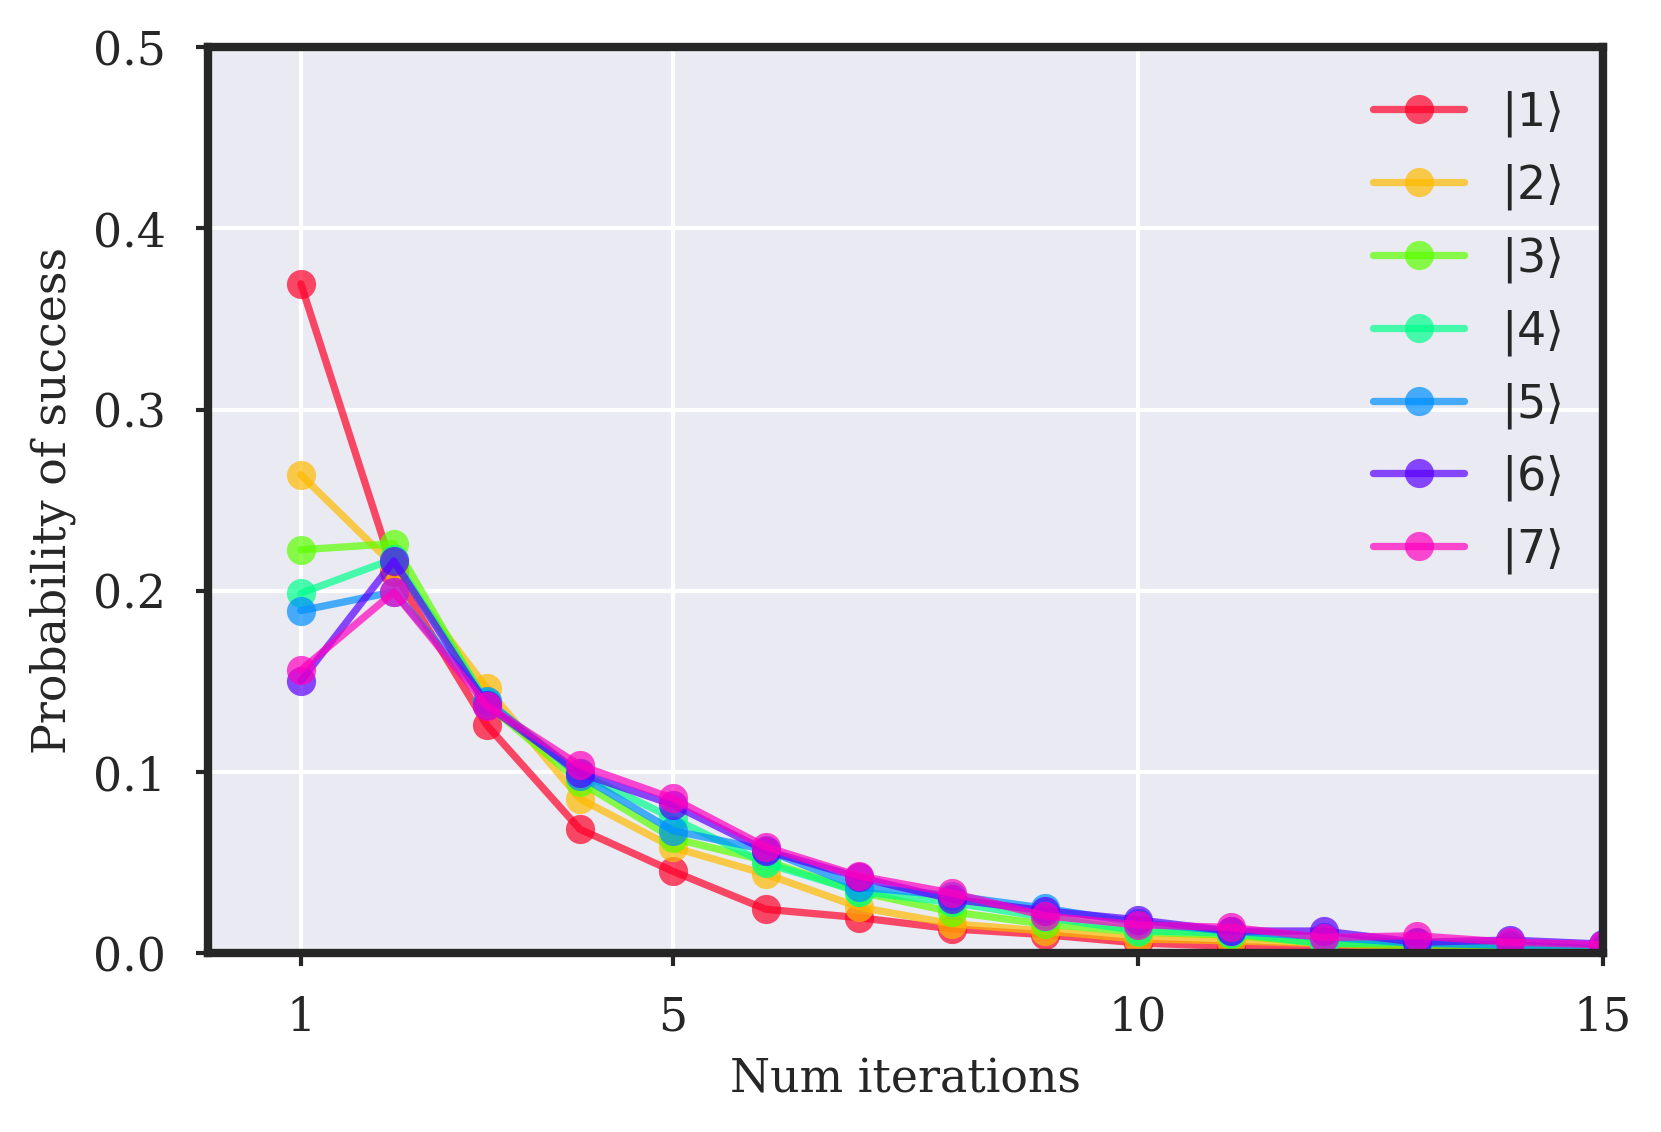

In [14]:
scale = 1.2

fontsize = 11

plt.style.use('seaborn') 
mpl_settings = {
    'text.usetex': False,
    'font.family': 'serif',
    'pgf.texsystem': 'pdflatex',
    'font.size': fontsize,
    'axes.titlesize': fontsize,     
    'axes.labelsize': fontsize,               # -> axis labels
    'legend.fontsize': fontsize,              # -> legends
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'ytick.major.size': 3,
    'xtick.major.size': 3,
    'axes.linewidth': 2,
    'axes.edgecolor': "0.15",
    'figure.dpi': 300
}

num_iterations = 5000
plt.rcParams.update(mpl_settings)

fig = plt.figure(figsize = (6, 4))

from cycler import cycler
cmap = plt.cm.gist_rainbow
c = cycler('color', cmap(np.linspace(0,1,7)) )
plt.rcParams["axes.prop_cycle"] = c

plt.fill_between(np.linspace(-2,0,3),-0.1,0.5, color="orange", alpha=0.7)
for i in range(1, 8):

    hist=np.histogram(iterations_cumulative[i], bins=np.arange(-1,max(iterations_cumulative[i])))
    #plt.scatter(np.arange(1,max(iterations_cumulative[i])-1), hist[0][2:]/num_iterations)
    plt.plot(np.arange(1,max(iterations_cumulative[i])-1), hist[0][2:]/num_iterations, '-o', alpha=0.7, label=r"$|{{{}}}\rangle$".format(i))
    
    #plt.scatter([-1],hist[0][0]/num_iterations, color="black", s=100, alpha=0.5)
    print(hist[0][0]/num_iterations)
    #plt.hlines(0,-2, len(hist[0]),linestyle="dashed", color="gray")
    print("Probability of success: {}".format(sum(hist[0][2:]/num_iterations)))

props = dict(boxstyle='round', facecolor='red', alpha=0.2)
# plt.text(-1.5,0.3,"FAIL", rotation="vertical", color="red" , fontsize=15,
#             verticalalignment='top', bbox=props)
plt.xticks([1]+list(range(5,len(hist[0]),5)))
plt.xlim(0, 15)
plt.legend()
plt.ylim(-0.0,0.5)
plt.xlabel("Num iterations")
plt.ylabel("Probability of success")

plt.savefig("comparison.pdf", format="pdf", dpi=300, bbox_inches = 'tight', pad_inches = 0)

Probability of success: 0.9078


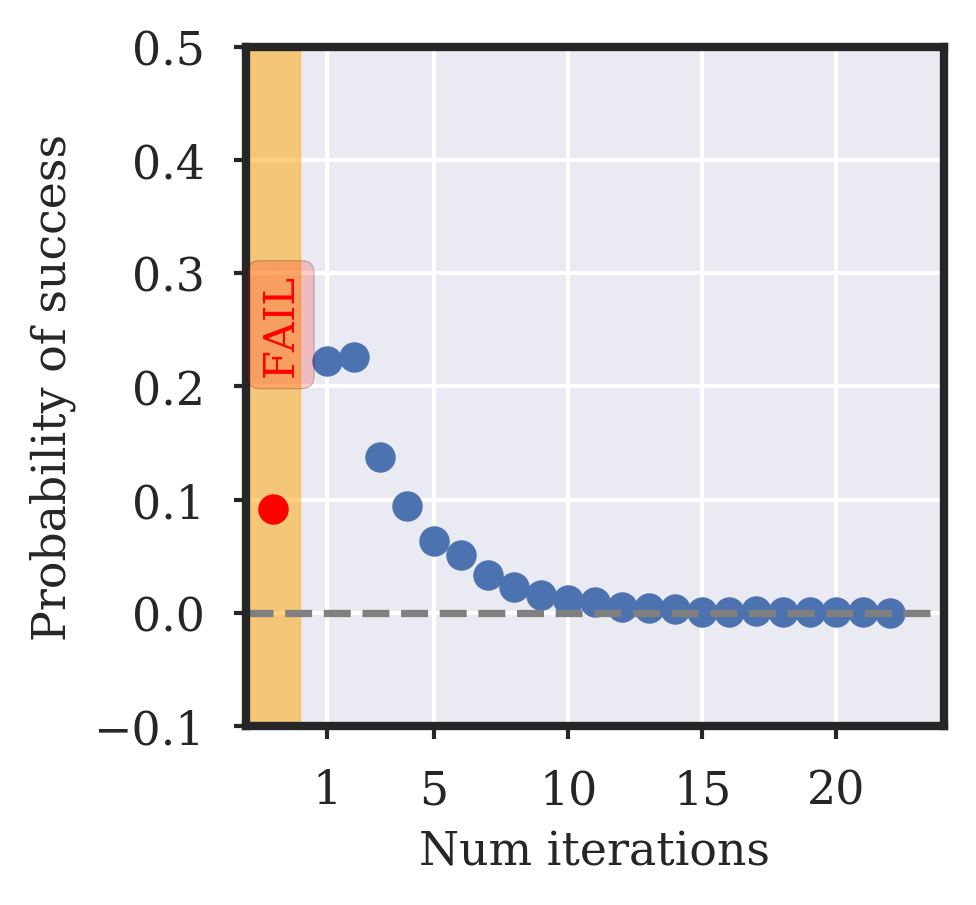

In [79]:
scale = 1.2

fontsize = 11

plt.style.use('seaborn') 
mpl_settings = {
    'text.usetex': False,
    'font.family': 'serif',
    'pgf.texsystem': 'pdflatex',
    'font.size': fontsize,
    'axes.titlesize': fontsize,     
    'axes.labelsize': fontsize,               # -> axis labels
    'legend.fontsize': fontsize,              # -> legends
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'ytick.major.size': 3,
    'xtick.major.size': 3,
    'axes.linewidth': 2,
    'axes.edgecolor': "0.15",
    'figure.dpi': 300
}


plt.rcParams.update(mpl_settings)

fig = plt.figure(figsize = (3, 3))

iterations = iterations_cumulative[3]


hist=np.histogram(iterations, bins=np.arange(-1,max(iterations)))
plt.scatter(np.arange(1,max(iterations)-1), hist[0][2:]/num_iterations)

plt.fill_between(np.linspace(-2,0,3),-0.1,0.5, color="orange", alpha=0.5)
plt.scatter([-1],hist[0][0]/num_iterations, color="red")

plt.xlim(-2,len(hist[0]))
plt.ylim(-0.1,0.5)
plt.xlabel("Num iterations")
plt.ylabel("Probability of success")
#plt.text(-1.2,0.4,"FAIL", rotation="vertical", color="red" )
plt.hlines(0,-2,len(hist[0]),linestyle="dashed", color="gray")

props = dict(boxstyle='round', facecolor='red', alpha=0.2)

# place a text box in upper left in axes coords
plt.text(-1.5,0.3,"FAIL", rotation="vertical", color="red" , fontsize=10,
        verticalalignment='top', bbox=props)
plt.xticks([1]+list(range(5,len(hist[0]),5)))

print("Probability of success: {}".format(sum(hist[0][2:]/num_iterations)))

# Other stuff


In [32]:
transitions=[]

for sequence in visited:
    #print(sequence)
    for i in range(len(sequence)-1):
        #print(sequence[i], sequence[i+1])
        transitions.append([sequence[i], sequence[i+1]])
        if transitions[-1][1]=="Target":
            transitions[-1][1]=-2
        if transitions[-1][1]=="Fail":
            transitions[-1][1]=-1

NameError: name 'visited' is not defined

In [ ]:
mat=np.zeros((len(focks)+2,len(focks)+2))
for transition in transitions:
    mat[transition[0]+2, transition[1]+2]+=1
mat/=num_iterations

In [ ]:
indeces=["Target", "Fail"]+[str(x) for x in range(0,len(focks),1)]

df=pd.DataFrame(mat.transpose(),index=indeces, columns=indeces)

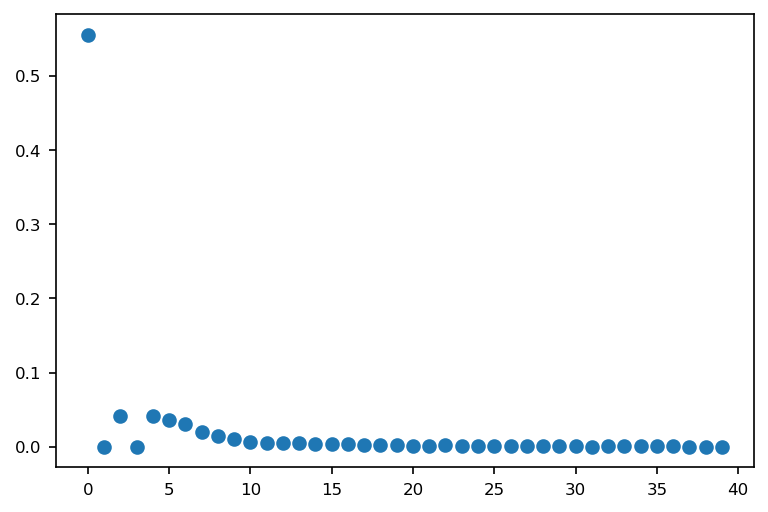

In [8]:
plt.scatter(np.arange(0,len(df.loc["Target"][2:])),df.loc["Target"][2:])

In [10]:
length=[0]
sum_length=0

displacements_sum=[]


for (x,y) in zip(visited, visited[::1]):
    sum_length+=length[-1]
    length.append(len(x)-1)
    displacements_sum.append(displacements[sum_length:sum_length+length[-1]].sum())


In [ ]:
plt.hist(displacements_sum, bins=np.arange(30))

In [28]:
iterations.shape

(5000,)